<a href="https://colab.research.google.com/github/SergeiSa/Control-Theory-Slides-Spring-2021/blob/main/ColabNotebooks/practice1_StateSpace_transformation_simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**

---

## **Practice Instructor**
Name: Simeon Nedelchev

Background:
* **MSTU STANKIN** (Bachelor/Master in Robotics 2018) 
* **Korea University of Technology And Education** (KoreaTech) (Master ME 2019), Research fellow 'BioRobotics' lab
* **Innopolis University** (PhD), Research fellow 'MCP' lab


Research interests:


*   **Control**: Nonlinear, Robust, Adaptive, Energy based, Noncolocated and Underactuated, with focus on discrete-time and physically inspired numerical methods.
*   **Online Identification and Estimation**: Moving Horizon Estimators, Sliding Mode Observers.
*  **Analytical Mechanics and Dynamical Systems**:
Dynamical Modeling, Limit Cycles, Constrained Dynamics (UK), Computational mechanics.
*  **Applied Optimization**:
Linear, Quadratic, and Nonlinear programming, Dynamical programming, Optimal Control, Optimal Mechanical Design. 


Feel free to contact me in person (in basement lab/office 105) or via [telegram](https://t.me/simkasimka) and [mail](https://t.me/simkasimka) if you face any problems with the course or would like to do research and work on hardware
## **Prerequisites for practice**
There are no strong prerequisites for this class, however:
* **Linear Algebra**, **Calculus**, **Differential Equations**, and **Dynamics** (Mechanics, Physics) courses will be really helpfull
* We will use a bit of **Python** in this class
* We will often use [mathematical quantifiers](https://en.wikipedia.org/wiki/Quantifier_(logic)). Revise them by going over [exercises](https://www.whitman.edu/mathematics/higher_math_online/section01.02.html) if you forgot some.

## **Notation**
We will use the following notation in "notebooks":
> A key points or equations looks like this 

>**QUESTION**: 
Questions related to the subject, pay attention to them, they may enhance your understanding of the topic

>**EXERCISE**: 
These exercises we will do during the practice sessions, remaining you may treat as your HW

>**BONUS EXERCISE** Problems that will be graded separately and will give you bonus points on final exam

## **Literature**
I personally suggest a following books on the subject:


*   C.T. Chen, **Linear System Theory and Design**

*   Vladimir I. Arnold, **Ordinary Differential Equations**

*   Steven H. Strogatz, **Nonlinear Dynamics and Chaos**





# **Practice 1: State Space modeling, Transformations and Simulation**
## **Goals for today**

---



During today practice we will:
*   Recall the notion of ODE, transform 
*   Write mathematical models in state space form.
*   Obtain solution of state space equations with `odeint`.


## **State Space and Ordinary Differential Equations**
A state-space representation is a mathematical model of a physical system as a set of input $\mathbf{u}$, output $\mathbf{y}$ and state variables $\mathbf{x}$ related by first-order differential equations (difference equations in discrete time). 

State variables $\mathbf{x}$ are variables whose values evolve through time $t$ in a way that depends on the values they have at any given time and also depends on the externally imposed values of input variables $\mathbf{u}$. Output $\mathbf{y}$ depend on the values of the state variables $\mathbf{x}$.

### **Ordinary Differential Equations**

Given $\mathcal{F}$, a function of $t$, $z$, and derivatives of $z$ . Then an equation of the form

$$
\mathcal{F} \left(t,z,\dot{z},\ldots ,z^{(n-1)}\right)=z^{(n)}
$$

is called an explicit **ordinary differential equation** of order n.

### **Nonlinear State Space**

General form of a state-space model can be written as system of two functions:
\begin{equation}
\begin{cases} 
\mathbf{\dot{x}} (t)=\boldsymbol{f}(t,\mathbf{x}(t),\mathbf{u}(t)) \\ 
\mathbf{y}(t)=\boldsymbol{h}(t,\mathbf{x}(t),\mathbf{u}(t))
\end{cases}
\end{equation}


In this class we consider a simplest case of equations above, namely **linear** ones.


### **Linear State Space**
if relationships between state, output and control is **linear**, we can formulate the model of system in following form:
\begin{equation}
\begin{cases} 
\mathbf{\dot{x}} (t)=\mathbf{A}(t)\mathbf{x}(t) + \mathbf{B}(t)\mathbf{u}(t) \\ 
\mathbf{y}(t)=\mathbf{C}(t)\mathbf{x}(t) + \mathbf{D}(t)\mathbf{u}(t)
\end{cases}
\end{equation}

where
*   $\mathbf{x} \in \mathbb{R}^n$ states of the system
*   $\mathbf{y} \in \mathbb{R}^l$ output vector
*   $\mathbf{u} \in \mathbb{R}^m$ control inputs
*   $\mathbf{A} \in \mathbb{R}^{n \times n}$ state matrix
*   $\mathbf{B} \in \mathbb{R}^{n \times m}$ input matrix
*   $\mathbf{C} \in \mathbb{R}^{l \times n}$ output matrix
*   $\mathbf{D} \in \mathbb{R}^{l \times m}$ feedforward matrix

Note that matrices $\mathbf{A},\mathbf{B},\mathbf{C},\mathbf{D}$ are time dependend, we call such systems **time-varient**.

However, in practice we often deal with systems whose dynamics is time-invarient and output is independent from control, such that we can rewrite the model as:
\begin{equation}
\begin{cases} 
\mathbf{\dot{x}} (t)=\mathbf{A}\mathbf{x}(t) + \mathbf{B}\mathbf{u}(t) \\ 
\mathbf{y}(t)=\mathbf{C}\mathbf{x}(t)
\end{cases}
\end{equation}

### **Unforced systems**

During today practice however we will consider a unforced (uncontrolled systems)as follows:
\begin{equation}
\mathbf{\dot{x}} (t)=\mathbf{A}\mathbf{x}(t) + \mathbf{b}
\end{equation}
where $\mathbf{b} \in \mathbb{R}^n$ is a constant vector

>**QUESTION:** Can we rewrite system above in the following form?
\begin{equation}
\mathbf{\dot{x}}_n (t)=\mathbf{A}_n\mathbf{x}_n(t)
\end{equation}




## **From the linear ODE to the State Space**


A probleim is to, given an ODE in canonical form:

$$a_{n}z^{(n)} +a_{n-1}z^{(n-1)}+...+a_{2}\ddot z+a_{1}\dot z + a_0 z= b_0$$

find its state space representation:

$$\dot{ \mathbf{x}} = \mathbf{A}\mathbf{x} + \mathbf{b}$$

### **Methodology**

The first step is to express higher derivatives as follows:

$$z^{(n)} = 
-\frac{a_{n-1}}{a_{n}}z^{(n-1)}-
...-
\frac{a_{2}}{a_{n}}\ddot z -
\frac{a_{1}}{a_{n}}\dot z - 
\frac{a_{0}}{a_{n}} z + 
\frac{b_0}{a_{n}}$$

Now let us introduce new variables $\mathbf{x}$ as follows:
$$
\mathbf{x} = 
\begin{bmatrix}
x_1 \\ 
x_{2} \\
... \\
x_n \\
\end{bmatrix}
=
\begin{bmatrix}
z \\
z^{(1)} \\
  ... \\
z^{(n-1)} \\
\end{bmatrix}
$$

Thus original ODE may be written as:
$$
\begin{bmatrix}
\dot{x}_1 \\ 
\dot{x}_{2} \\
... \\
\dot{x}_n \\
\end{bmatrix}
=
\begin{bmatrix}
x_2 \\ 
x_3 \\
... \\
-\frac{a_{k-1}}{a_{n}}x_n-
...-
\frac{a_{2}}{a_{n}} x_3 -
\frac{a_{1}}{a_{n}} x_2 - 
\frac{a_{0}}{a_{n}} x_1 + 
\frac{b_0}{a_{n}} \\
\end{bmatrix}$$

Finally, in a matrix form:
\begin{equation}
\mathbf{\dot{x}} (t) = \mathbf{A}\mathbf{x}(t) + \mathbf{b}
\end{equation}

>**QUESTION:** How matrix $\mathbf{A}$ and vector $\mathbf{b}$ will look like?


 >### **Exercises**
>
> 1) Convert to State Space represantation
>
>* $10 z^{(4)} -7  z^{(3)} + 2   \ddot z + 0.5 \dot z + 4z  = 15$
* $5  z^{(4)} -17 z^{(3)} - 3   \ddot z + 1.5 \dot z + 2z  = 25$
* $-3 z^{(4)} +  22 z^{(3)} + 4   \ddot z + 1.5 \dot z + 1z  = 15$
* $5  z^{(4)} -17 z^{(3)} - 1.5 \ddot z + 100 \dot z + 1.1z= 45$
* $1.5 z^{(4)} -23 z^{(3)} - 2.5 \ddot z + 0.1 \dot z + 100z= -10$
>
> 2) Do the same in the oposit way, in order to convert the following to a second order ODE:
>
>$$\dot{\mathbf{x}} = \mathbf{A}\mathbf{x}
$$
>
>with wollowing matrices $\mathbf{A}$:
>$$
\begin{bmatrix} 1 & 0 \\ -5 & -10
\end{bmatrix},\quad
\begin{bmatrix} 0 & 8 \\ 1 & 3
\end{bmatrix}
,\quad
\begin{bmatrix} 0 & 8 \\ 6 & 0
\end{bmatrix}
,\quad
\begin{bmatrix} 0 & 1 \\ 6 & 3
\end{bmatrix}
$$


## **Intro to Simulation (solution of ODE)**
While studying ODE $\dot{\mathbf{x}} = \boldsymbol{f}(\mathbf{x}, \mathbf{u}, t)$, one is often interested in its solution $\mathbf{x}(t)$ (integral curve):
\begin{equation}
\mathbf{x} = \int_{t_0}^{t_f} \boldsymbol{f}(t,\mathbf{x}(t),\mathbf{u}(t))dt,\quad \text{s.t: } \mathbf{x}(t_0) = \mathbf{x}_0
\end{equation}

In most practical situations the integral above cannot be solved analyticaly and one should consider numerical integration instead.




In [ ]:
import numpy as np
from scipy.integrate import odeint

n = 3
A = np.array([[0, 1, 0], 
              [0, 0, 1], 
              [-10, -5, -2]])

# x_dot from state space
def f(x, t):
    return A.dot(x)

t0 = 0 # Initial time 
tf = 10 # Final time
t = np.linspace(t0, tf, 1000)

x0 = np.random.rand(n)  # initial state

solution = {"ss": odeint(f, x0, t, args = (1,2,3,4))}

Let us plot the result of simulation:

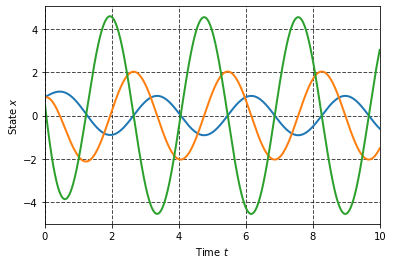

In [ ]:

from matplotlib.pyplot import *

plot(t, solution['ss'], linewidth=2.0)
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([t0, tf])
ylabel(r'State ${x}$')
xlabel(r'Time $t$')
show()

>**QUESTION:** How would you find analytical solution for linear state space equations:
\begin{equation}
\mathbf{\dot{x}} (t)=\mathbf{A}\mathbf{x}(t)
\end{equation}
>**TIP:** recall the solution of the equation $\dot{x} = a x$, and try to generilize it to the $n$-dimensional case. 


>### **Exercises**
>
> 1) Convert the following ODE to state space and simulate them from random initial conditions. If solution diverges, try to change parameters so it will converge
>
>* $10 z^{(5)} + 10 z^{(4)} -7  z^{(3)} + 2   \ddot z + 0.5 \dot z + 4z  = 0$
* $1 z^{(5)} + 5  z^{(4)} -17 z^{(3)} - 3   \ddot z + 1.5 \dot z + 2z  = 0$
* $6 z^{(5)} -3 z^{(4)}  22 z^{(3)} + 4   \ddot z + 1.5 \dot z + 1z  = 0$
* $22 z^{(5)} + 5  z^{(4)} -17 z^{(3)} - 1.5 \ddot z + 100 \dot z + 1.1z = 0$
* $-10 z^{(5)} + 1.5z^{(4)} -23 z^{(3)} - 2.5 \ddot z + 0.1 \dot z + 100z = 0$
>
> 2) Solve the same but without converting it to state space.
>
> 3) Find or derive equations for a mass-spring-damper system (shown on figure below), write them in state-space and second order ODE forms, integrate them from different initial conditions, play with coefficients and investigate how they affect the solution.

<p><img alt="mbk" height="250px" src="https://drive.google.com/uc?id=1ouEckIc8hm6IOTJ5uGVJHCwx2tBeyKj8" align="center" hspace="350px" vspace="0px"></p>


>### **Bonus Exercises**
>
>* Implement your own integration routine that will take state-space function 
$\mathbf{f}$, free variable $t$, and initial state $\mathbf{x}(0)$ as input and produce the solution $\mathbf{x}^*(t)$ as output. You may use [Runge–Kutta method](https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods) 
>
>* Suppose Romeo is in love with Juliet, but in our version of the story, Juliet is a fickle lover. The more Romeo loves her, the more she wants to run away and hide, such that the rate of her love is decreasing proportional to love of Romeo with constant $b$. But when he takes the hint and backs off, she begins to find him strangely attractive and her love raise again with same rate. He, on the other hand, tends to echo her: he warms up when she loves him and cools down when she hates him, but with rate proportional to constant $a$. Write differential equation that will model how their love evolve in time. Solve them and plot the result.
